In [1]:
## Connect to DB server on AWS
import mysql.connector 
import config

cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd
)
cursor = cnx.cursor()
headers = {"Accept-Language": "en-US, en;q=0.5"}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools

In [3]:
# #Create new DB
# cursor.execute("CREATE DATABASE Movie_Project")

In [4]:
#connect to Movie_Project database
cnx.database = 'Movie_Project'

In [5]:
import requests

url = "https://www.imdb.com/list/ls022596827/"
page = requests.get(url)
page.content

b'\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls022596827?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>2019 movies - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex

In [6]:
#create soup and content
from bs4 import BeautifulSoup as bs
soup = bs(page.content, 'html.parser')
content = soup.find_all(class_='lister-item-content')
content[20].find_all('a')[0].string

'Rocketman'

# Get movie name

In [7]:
name_list = []
for i in range(len(content)):
    try:
        get_text = content[i].find_all('a')[0].string
    except:
        get_text = 'no name found'
    name_list.append(get_text)
name_list


['Dark Phoenix',
 'The Irishman',
 'Shazam!',
 'John Wick: Chapter 3 - Parabellum',
 'Godzilla: King of the Monsters',
 'It Chapter Two',
 'Hellboy',
 'Glass',
 'Aladdin',
 'Star Wars: The Rise of Skywalker',
 'Spider-Man: Far from Home',
 'Men in Black: International',
 'Pet Sematary',
 'Terminator: Dark Fate',
 'Fast & Furious Presents: Hobbs & Shaw',
 'Captive State',
 'Jumanji: The Next Level',
 'Fighting with My Family',
 'Ad Astra',
 'Triple Frontier',
 'Rocketman',
 'Earthquake Bird',
 'Angel Has Fallen',
 'Motherless Brooklyn',
 'Rambo: Last Blood',
 'Gemini Man',
 'Shaft',
 'A Beautiful Day in the Neighborhood',
 'The Kid Who Would Be King',
 'Cold Pursuit',
 'The Education of Fredrick Fitzell',
 'Stuber',
 'Long Shot',
 'The Lighthouse',
 'The Aftermath',
 'Angel of Mine',
 'Ride Like a Girl',
 'Someone Great',
 'Escape Plan: The Extractors',
 'The Highwaymen',
 'Joker',
 'Anna',
 'The Beach Bum',
 'The Kid',
 'Alita: Battle Angel',
 'The Peanut Butter Falcon',
 'Midsommar',


In [8]:
len(name_list)

100

# Get movie genre

In [9]:
#get genre
genre_list = []
for i in range(len(content)):
    try:
        genre = content[i].find_all(class_='genre')[0].get_text().strip('\n').strip(' ')
        genre_list.append(genre)
    except:
        genre = "No genre found"
genre_list

['Action, Adventure, Sci-Fi',
 'Biography, Crime, Drama',
 'Action, Adventure, Comedy',
 'Action, Crime, Thriller',
 'Action, Adventure, Fantasy',
 'Drama, Fantasy, Horror',
 'Action, Adventure, Fantasy',
 'Drama, Sci-Fi, Thriller',
 'Adventure, Family, Fantasy',
 'Action, Adventure, Fantasy',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure, Comedy',
 'Horror, Mystery, Thriller',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure',
 'Drama, Sci-Fi, Thriller',
 'Action, Adventure, Comedy',
 'Biography, Comedy, Drama',
 'Adventure, Drama, Mystery',
 'Action, Adventure, Crime',
 'Biography, Drama, Music',
 'Crime, Drama, Mystery',
 'Action, Thriller',
 'Crime, Drama, Mystery',
 'Action, Adventure, Thriller',
 'Action, Drama, Sci-Fi',
 'Action, Comedy, Crime',
 'Biography, Drama',
 'Action, Adventure, Family',
 'Action, Crime, Drama',
 'Drama, Thriller',
 'Action, Comedy, Crime',
 'Comedy, Romance',
 'Drama, Fantasy, Horror',
 'Drama, Romance, War',
 'Drama, Mystery, Thriller',
 'Biograph

# Get movie ratings

In [10]:
#get ratings
rating_list = []
for i in range(len(content)):
    try:
        rating = content[i].find_all(class_='ipl-rating-star__rating')[0].string 
    except:
        rating = 'no rating found'
    rating_list.append(rating)
len(rating_list)


100

# Get movie year

In [ ]:
#get year
year_list = []
for i in range(len(content)):
    try:
        year = content[8].find_all(class_='lister-item-year text-muted unbold')[0].string.strip('()')
        year1 = year.strip('I').strip(')').strip(' ').strip('(')
    except:
        year1 = 'no year'
    year_list.append(year1)
year_list

In [ ]:
year = content[8].find_all(class_='lister-item-year text-muted unbold')[0].string.strip('()')
year.strip('I').strip(')').strip(' ').strip('()')

In [ ]:
content[0].find_all(class_='lister-item-year text-muted unbold')[0].string.strip('()')


# Get movie rated

In [ ]:
#get r rated...
type_list = []
for i in content:
    try:
        type1 = i.find_all(class_='certificate')[0].string
    except:
        type1 = 'no rating'
    type_list.append(type1)
type_list

In [ ]:
soup.find_all('strong')[0].string

# Create DataFrame

In [ ]:
d = {'Movie':name_list, 'Genre': genre_list, 'Release Year': year_list, "IMDB Rating": rating_list, 'Rated': type_list}
d

In [ ]:
df2019 = pd.DataFrame(d)
df2019

In [ ]:
df2019

# Create tables

In [ ]:
# #create a table for Movie_info
# create_table_movie_info_2019 = """
#     CREATE TABLE Movie_info_2019 (
#     Movie varchar(255) PRIMARY KEY,
#     Genre varchar(255),
#     Release_Year INTEGER(255),
#     IMDB_Rating FLOAT,
#     Rated varchar(255)
#     );
# """

# #create a table for Movie_info
# create_table_movie_info_2018 = """
#     CREATE TABLE Movie_info_2018 (
#     Movie varchar(255) PRIMARY KEY,
#     Genre varchar(255),
#     Release_Year INTEGER(255),
#     IMDB_Rating FLOAT,
#     Rated varchar(255)
#     );
# """

# #create a table for Movie_info
# create_table_movie_info_2017 = """
#     CREATE TABLE Movie_info_2017 (
#     Movie varchar(255) PRIMARY KEY,
#     Genre varchar(255),
#     Release_Year INTEGER(255),
#     IMDB_Rating FLOAT,
#     Rated varchar(255)
#     );
# """

# #create a table for Movie_info
# create_table_movie_info_2016 = """
#     CREATE TABLE Movie_info_2016 (
#     Movie varchar(255) PRIMARY KEY,
#     Genre varchar(255),
#     Release_Year INTEGER(255),
#     IMDB_Rating FLOAT,
#     Rated varchar(255)
#     );
# """

# #create a table for Movie_info
# create_table_movie_info_2015 = """
#     CREATE TABLE Movie_info_2015 (
#     Movie varchar(255) PRIMARY KEY,
#     Genre varchar(255),
#     Release_Year INTEGER(255),
#     IMDB_Rating FLOAT,
#     Rated varchar(255)
#     );
# """

# #create a table for Movie_info
# create_table_movie_info_2014 = """
#     CREATE TABLE Movie_info_2014 (
#     Movie varchar(255) PRIMARY KEY,
#     Genre varchar(255),
#     Release_Year INTEGER(255),
#     IMDB_Rating FLOAT,
#     Rated varchar(255)
#     );
# """

# #create a table for Movie_info
# create_table_movie_info_2013 = """
#     CREATE TABLE Movie_info_2013 (
#     Movie varchar(255) PRIMARY KEY,
#     Genre varchar(255),
#     Release_Year INTEGER(255),
#     IMDB_Rating FLOAT,
#     Rated varchar(255)
#     );
# """

# cursor.execute(create_table_movie_info_2019)
# # # cursor.execute(create_table_movie_info_2018)
# # # # cursor.execute(create_table_movie_info_2017)
# # cursor.execute(create_table_movie_info_2016)
# # # # cursor.execute(create_table_movie_info_2015)
# # # # cursor.execute(create_table_movie_info_2014)
# # # # cursor.execute(create_table_movie_info_2013)



In [ ]:
cnx.database = 'Movie_Project'

# 2019 movies
steps:
1. create DataFrame 
2. merge and parse into a list of tuple
3. insert data to sql function 

In [ ]:
def merge(list1, list2, list3, list4, list5):  
    merged_list = [(list1[i], list2[i], list3[i], list4[i], list5[i]) for i in range(0, len(list1))]
    return merged_list 

parsed_data = merge(name_list, genre_list, year_list, rating_list, type_list)
parsed_data

In [ ]:
def insert_data(cnx, cursor, parsed_data):
    insert_Movie_Project = """INSERT INTO Movie_info_2019 (Movie, Genre, Release_Year, IMDB_Rating, Rated) VALUES (%s, %s, %s, %s, %s);"""
    cursor.executemany(insert_Movie_Project, parsed_data)
    cnx.commit()
    return
insert_data(cnx, cursor, parsed_data)

# 2018 movies
steps:
1. create DataFrame 
2. merge and parse into a list of tuple
3. insert data to sql 

In [11]:
def get_DF(url):
    page = requests.get(url)
    page.content

    from bs4 import BeautifulSoup as bs
    soup = bs(page.content, 'html.parser')
    content = soup.find_all(class_='lister-item-content')
    content[20].find_all('a')[0].string

    name_list = []
    for i in range(len(content)):
        try:
            get_text = content[i].find_all('a')[0].string
        except:
            get_text = 'no name found'
        name_list.append(get_text)
    name_list


    #get genre
    genre_list = []
    for i in range(len(content)):
        try:
            genre = content[i].find_all(class_='genre')[0].get_text().strip('\n').strip(' ')
            genre_list.append(genre)
        except:
            genre = "No genre found"
    len(genre_list)


    #get ratings
    rating_list = []
    for i in range(len(content)):
        try:
            rating = content[i].find_all(class_='ipl-rating-star__rating')[0].string 
        except:
            rating = 'no rating found'
        rating_list.append(rating)
    len(rating_list)

    
    #get year
    year_list = []
    for i in range(len(content)):
        try:
            year = content[i].find_all(class_='lister-item-year text-muted unbold')[0].string.strip('()')
        except:
            year = 'no year'
        year_list.append(year)
    len(year_list)


    #get r rated...
    type_list = []
    for i in content:
        try:
            type1 = i.find_all(class_='certificate')[0].string
        except:
            type1 = 'no rating'
        type_list.append(type1)
    type_list

    d = {'Movie':name_list, 'Genre': genre_list, 'Release Year': year_list, "IMDB Rating": rating_list, 'Rated': type_list}
    d

    df = pd.DataFrame(d)

    return df

df2018 = get_DF("https://www.imdb.com/list/ls020941218/")
df2018


In [12]:
def merge(list1, list2, list3, list4, list5):  
    merged_list_2018 = [(list1[i], list2[i], list3[i], list4[i], list5[i]) for i in range(0, len(list1))]
    return merged_list_2018

parsed_data_2018 = merge(df2018['Movie'], df2018['Genre'], df2018['Release Year'], df2018['IMDB Rating'], df2018['Rated'])
parsed_data_2018

In [13]:
#insert 2018 movie info into SQL
def insert_data_2018(cnx, cursor, parsed_data):
    insert_Movie_Project = """INSERT INTO Movie_info_2018 (Movie, Genre, Release_Year, IMDB_Rating, Rated) VALUES (%s, %s, %s, %s, %s);"""
    cursor.executemany(insert_Movie_Project, parsed_data)
    cnx.commit()
    return
insert_data_2018(cnx, cursor, parsed_data_2018)

# 2017 movies
steps:
1. create DataFrame 
2. merge and parse into a list of tuple
3. insert data to sql 

In [14]:
df2017 = get_DF("https://www.imdb.com/list/ls058982125/")
df2017

NameError: name 'get_DF' is not defined

In [ ]:
df2017['Movie']

In [ ]:
parsed_data_2017 = merge(df2017['Movie'], df2017['Genre'], df2017['Release Year'], df2017['IMDB Rating'], df2017['Rated'])
parsed_data_2017

In [ ]:
#insert 2017 movie info into SQL
def insert_data_2017(cnx, cursor, parsed_data):
    insert_Movie_Project = """INSERT INTO Movie_info_2017 (Movie, Genre, Release_Year, IMDB_Rating, Rated) VALUES (%s, %s, %s, %s, %s);"""
    cursor.executemany(insert_Movie_Project, parsed_data)
    cnx.commit()
    return
insert_data_2017(cnx, cursor, parsed_data_2017)

# 2016 movies
steps:
1. create DataFrame 
2. merge and parse into a list of tuple
3. insert data to sql 

In [ ]:
df2016 = get_DF("https://www.imdb.com/list/ls058938704/")
df2016

parsed_data_2016 = merge(df2016['Movie'], df2016['Genre'], df2016['Release Year'], df2016['IMDB Rating'], df2016['Rated'])
parsed_data_2016

#insert 2016 movie info into SQL
def insert_data_2016(cnx, cursor, parsed_data):
    insert_Movie_Project = """INSERT INTO Movie_info_2016 (Movie, Genre, Release_Year, IMDB_Rating, Rated) VALUES (%s, %s, %s, %s, %s);"""
    cursor.executemany(insert_Movie_Project, parsed_data)
    cnx.commit()
    return
insert_data_2016(cnx, cursor, parsed_data_2016)

# 2015 movies
steps:
1. create DataFrame 
2. merge and parse into a list of tuple
3. insert data to sql 

In [ ]:
df2015 = get_DF("https://www.imdb.com/list/ls073809351/")
df2015

parsed_data_2015 = merge(df2015['Movie'], df2015['Genre'], df2015['Release Year'], df2015['IMDB Rating'], df2015['Rated'])
parsed_data_2015

#insert 2015 movie info into SQL
def insert_data_2015(cnx, cursor, parsed_data):
    insert_Movie_Project = """INSERT INTO Movie_info_2015 (Movie, Genre, Release_Year, IMDB_Rating, Rated) VALUES (%s, %s, %s, %s, %s);"""
    cursor.executemany(insert_Movie_Project, parsed_data)
    cnx.commit()
    return
insert_data_2015(cnx, cursor, parsed_data_2015)

# 2014 movies

In [ ]:
# steps:
# 1. create DataFrame 
# 2. merge and parse into a list of tuple
# 3. insert data to sql function 

df2014 = get_DF("https://www.imdb.com/list/ls059824992/")
df2014

parsed_data_2014 = merge(df2014['Movie'], df2014['Genre'], df2014['Release Year'], df2014['IMDB Rating'], df2014['Rated'])
parsed_data_2014

#insert 2014 movie info into SQL
def insert_data_2014(cnx, cursor, parsed_data):
    insert_Movie_Project = """INSERT INTO Movie_info_2014 (Movie, Genre, Release_Year, IMDB_Rating, Rated) VALUES (%s, %s, %s, %s, %s);"""
    cursor.executemany(insert_Movie_Project, parsed_data)
    cnx.commit()
    return
insert_data_2014(cnx, cursor, parsed_data_2014)

In [ ]:
df2014

In [15]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [16]:
df = pd.read_csv("All_Movie_Data.csv")



In [17]:
df.head(10)

,Rank,Movie,World_Wide_Sales,Domestic_Sales,Foriegn_Sales,Genre,Release_Year,IMBD_Rating,Rated,Year_Id
0,2,The Hobbit: The Battle of the Five Armies,956020000,255120000.0,700900000.0,"Adventure, Fantasy",2014,7.4,PG-13,2
1,3,Guardians of the Galaxy,772777000,333177000.0,439600000.0,"Action, Adventure, Comedy",2014,8.0,PG-13,3
2,6,X-Men: Days of Future Past,746046000,233922000.0,512124000.0,"Action, Adventure, Sci-Fi",2014,8.0,PG-13,6
3,7,Captain America: The Winter Soldier,714422000,259767000.0,454655000.0,"Action, Adventure, Sci-Fi",2014,7.7,PG-13,7
4,8,Dawn of the Planet of the Apes,710645000,208546000.0,502099000.0,"Action, Adventure, Drama",2014,7.6,PG-13,8
5,9,The Amazing Spider-Man 2,708982000,202854000.0,506128000.0,"Action, Adventure, Sci-Fi",2014,6.6,PG-13,9
6,10,Interstellar,677464000,188020000.0,489444000.0,"Adventure, Drama, Sci-Fi",2014,8.6,PG-13,10
7,11,Big Hero 6,657828000,222528000.0,435300000.0,"Animation, Action, Adventure",2014,7.8,PG,11
8,12,How to Train Your Dragon 2,621538000,177003000.0,444535000.0,"Animation, Action, Adventure",2014,7.8,PG,12
9,13,American Sniper,547426000,350126000.0,197300000.0,"Action, Biography, Drama",2014,7.3,R,13


In [18]:
df[['IMBD_Rating','World_Wide_Sales','Foriegn_Sales','Domestic_Sales']]

,IMBD_Rating,World_Wide_Sales,Foriegn_Sales,Domestic_Sales
0,7.4,956020000,700900000.0,255120000.0
1,8.0,772777000,439600000.0,333177000.0
2,8.0,746046000,512124000.0,233922000.0
3,7.7,714422000,454655000.0,259767000.0
4,7.6,710645000,502099000.0,208546000.0
...,...,...,...,...
430,7.3,6863150,4874610.0,1988550.0
431,5.5,4554060,1051460.0,3502600.0
432,6.7,2414270,3355.0,2410910.0
433,6.5,1719160,682420.0,1036740.0


In [21]:
Worldwide = df['World_Wide_Sales']

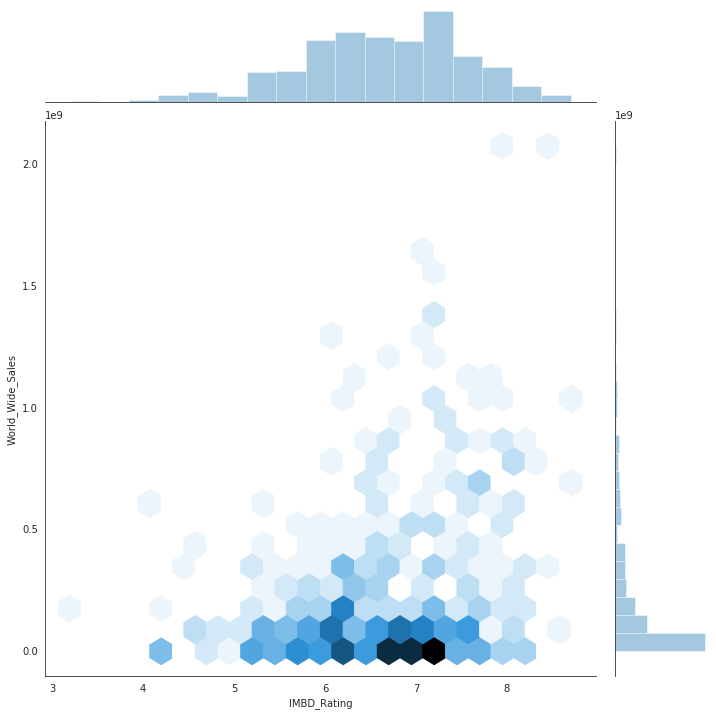

In [22]:
with sns.axes_style('white'):
    sns.jointplot(rating,Worldwide, kind='hex',height=10)


In [23]:
df[['IMBD_Rating','Domestic_Sales']]

,IMBD_Rating,Domestic_Sales
0,7.4,255120000.0
1,8.0,333177000.0
2,8.0,233922000.0
3,7.7,259767000.0
4,7.6,208546000.0
...,...,...
430,7.3,1988550.0
431,5.5,3502600.0
432,6.7,2410910.0
433,6.5,1036740.0


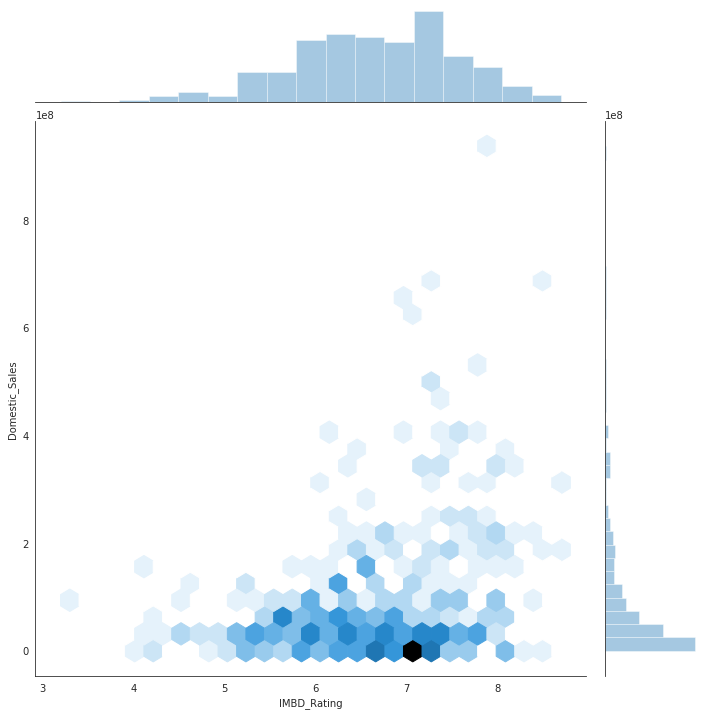

In [27]:
domestic = df['Domestic_Sales']
with sns.axes_style('white'):
    sns.jointplot(rating,domestic, kind='hex',height=10)

In [28]:
foreign = df['Foriegn_Sales']

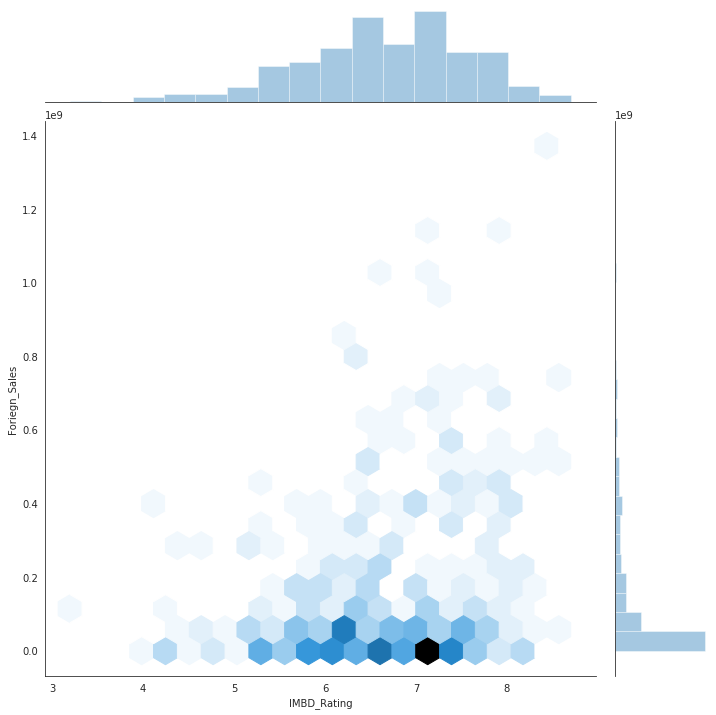

In [29]:
with sns.axes_style('white'):
    sns.jointplot(rating,foreign, kind='hex',height=10)